In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow
import keras
from keras import layers
import warnings
warnings.filterwarnings("ignore")

2024-03-28 07:59:07.241097: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-28 07:59:07.241203: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-28 07:59:07.368834: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
imdg=ImageDataGenerator()
valimdg=ImageDataGenerator(validation_split=0.2)

img_size=(150,150)
batch_size=64
inputpath='/kaggle/input/lensing/train'
valpath='/kaggle/input/lensing/val'

traindata=imdg.flow_from_directory(directory=inputpath,
                                   target_size=img_size,
                                   color_mode='rgb',
                                   batch_size=64,
                                   class_mode='sparse',
                                   shuffle=True,)

testdata=valimdg.flow_from_directory(directory=valpath,
                                   target_size=img_size,
                                   color_mode='rgb',
                                   batch_size=64,
                                   class_mode='sparse',
                                   shuffle=True,
                                   subset='validation'
                                  )

valdata=valimdg.flow_from_directory(directory=valpath,
                                   target_size=img_size,
                                   color_mode='rgb',
                                   batch_size=64,
                                   class_mode='sparse',
                                   shuffle=True,
                                   subset='training'
                                  )

Found 30000 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.
Found 6000 images belonging to 3 classes.


In [3]:
from keras.applications import MobileNetV3Large,ResNet50V2,MobileNet,ResNet152V2,InceptionResNetV2
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling1D,Flatten,Dropout,Input

In [4]:
base_model = ResNet152V2(weights='imagenet', include_top=False, input_shape=(150,150,3),pooling='avg')

inputs= Input((150,150,3))
x = base_model.output
x = Dropout(0.3)(x) 
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x) 
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.3)(x) 
x = Dense(16, activation='relu')(x)
predictions = Dense(3,activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

234545216/234545216 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 156, 156,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 75, 75,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 77, 77,    │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 38, 38,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 38, 38,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 38, 38,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 38, 38,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 38, 38,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 38, 38,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 40, 40,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 38, 38,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 38, 38,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 38, 38,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 38, 38,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 38, 38,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 38, 38,    │          0 │ conv2_block1_0_c

 Total params: 59,531,171 (227.09 MB)

 Trainable params: 59,387,427 (226.55 MB)

 Non-trainable params: 143,744 (561.50 KB)

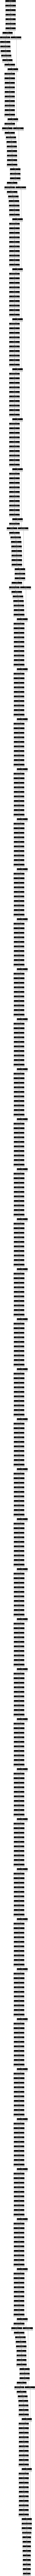

In [5]:
keras.utils.plot_model(model,show_shapes=True)

In [6]:
model.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=1e-4),loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [7]:
callbacks=tensorflow.keras.callbacks.EarlyStopping(patience=3,min_delta=0.0001,restore_best_weights=True,)
history=model.fit(traindata,epochs=25,batch_size=64,validation_data=(valdata),callbacks=[callbacks])

Epoch 1/25


I0000 00:00:1711612996.584387      90 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 75/469 ━━━━━━━━━━━━━━━━━━━━ 3:14 493ms/step - accuracy: 0.3082 - loss: 1.1323

W0000 00:00:1711613117.076444      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 684ms/step - accuracy: 0.3296 - loss: 1.1101

W0000 00:00:1711613383.344508      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


469/469 ━━━━━━━━━━━━━━━━━━━━ 565s 827ms/step - accuracy: 0.3296 - loss: 1.1101 - val_accuracy: 0.3470 - val_loss: 1.0995
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 187s 393ms/step - accuracy: 0.3887 - loss: 1.0741 - val_accuracy: 0.5690 - val_loss: 1.3108
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 186s 395ms/step - accuracy: 0.7080 - loss: 0.6725 - val_accuracy: 0.7843 - val_loss: 0.5364
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 188s 398ms/step - accuracy: 0.8546 - loss: 0.3953 - val_accuracy: 0.8490 - val_loss: 0.4089
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 186s 394ms/step - accuracy: 0.8954 - loss: 0.2999 - val_accuracy: 0.8878 - val_loss: 0.3086
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 202s 394ms/step - accuracy: 0.9194 - loss: 0.2282 - val_accuracy: 0.8703 - val_loss: 0.3293
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 185s 394ms/step - accuracy: 0.9379 - loss: 0.1806 - val_accuracy: 0.8923 - val_loss: 0.3110
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 186s 394ms/step - accuracy: 0.9459 - loss: 0.16

In [8]:
model.evaluate(testdata,batch_size=64)

24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 873ms/step - accuracy: 0.8958 - loss: 0.3034


[0.3155670464038849, 0.8893333077430725]

In [9]:
from sklearn.metrics import classification_report
prdns=[]
truths=[]
f = lambda x: np.argmax(x)
for count in range(0,len(testdata)):
    print(count,end='\r')
    batch=next(testdata)
    x=batch[0]
    y=batch[1]
    prdn=model.predict(x.reshape(-1,150,150,3),verbose=0)
    for i in prdn:
        prdns.append(f(i))
    for i in y:
        truths.append(i)

In [10]:
print(classification_report(prdns,truths))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       502
           1       0.85      0.88      0.86       479
           2       0.91      0.88      0.90       519

    accuracy                           0.89      1500
   macro avg       0.89      0.89      0.89      1500
weighted avg       0.89      0.89      0.89      1500



In [11]:
import pandas as pd
histo=pd.DataFrame(history.history)

<Axes: >

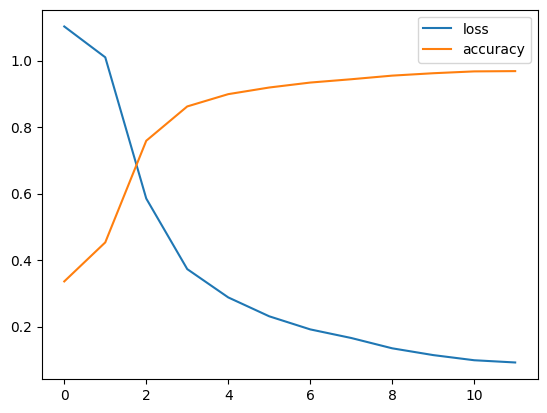

In [12]:
histo[['loss','accuracy']].plot()

<Axes: >

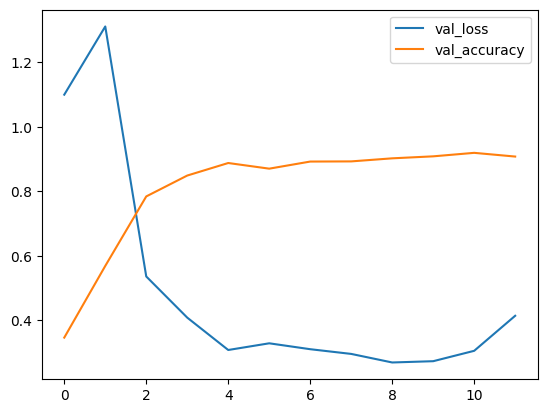

In [13]:
histo[['val_loss','val_accuracy']].plot()

<Axes: >

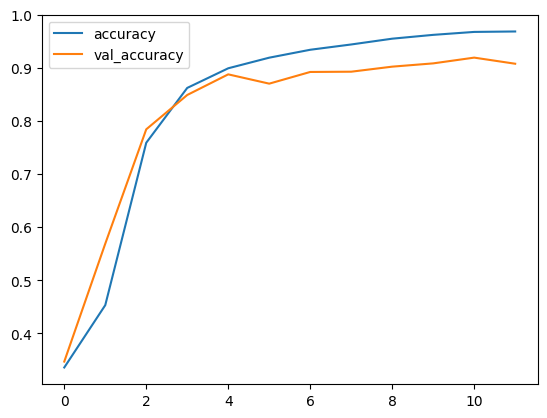

In [14]:
histo[['accuracy','val_accuracy']].plot()

In [15]:
model.save('Glensinghalo_classifier.h5')

# For Inference
To predict using the model

we use the built in predict() method in the keras model definition for the above model that we just trained or load the weights of the model if we are running the model at a later time. 

In [16]:
classes=testdata.class_indices
classes={k:v for v,k in classes.items()}
classes

{0: 'no', 1: 'sphere', 2: 'vort'}

In [17]:
#model=keras.models.load_model()
i=np.random.randint(0,64)
print(classes[testdata[0][1][i]])
classes[np.argmax(model.predict(testdata[0][0][i].reshape(1,150,150,3),verbose=0))]

vort


'vort'